In [291]:
from pandas import read_csv
import numpy as np
import matplotlib.pylab as plt
series = read_csv('/media/mydata/AIMS-CAMEROON/Data science/WEEK 3/GROUP ASSIGNEMENT/10patient2.csv', header=0, index_col=0)
def function(n,m,f):
    l=[]
    for j in range(n,m+1):
        a=series.iloc[j-1]
        l.append(list(a))
    l2=l[0]
    for i in range(1,23):
        l2=l2+l[i]
    t=np.linspace(0,23,4094)    
    plt.plot(t,l2,color=f)
    plt.show


In [370]:
series.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
X1.V1.301,-21,-28,-37,-41,-51,-62,-65,-63,-50,-19,...,-14,-27,-27,-36,-41,-65,-89,-116,-129,-109
X2.V1.301,-84,-54,-23,19,56,87,101,85,59,43,...,103,88,43,-9,-57,-71,-55,-24,14,29
X3.V1.301,21,-1,-17,-30,-43,-38,-35,-22,-3,18,...,40,32,6,-7,-7,0,-4,-8,-7,-4
X4.V1.301,4,12,11,8,24,40,53,58,57,54,...,-18,-9,14,30,32,29,36,59,64,65
X5.V1.301,58,40,14,-5,-13,-20,-15,-6,-10,-19,...,9,13,33,54,78,96,99,81,52,33
X6.V1.301,8,-6,-6,7,14,20,26,21,17,22,...,-91,-78,-67,-68,-77,-76,-67,-54,-16,13
X7.V1.301,37,48,42,25,-1,-16,-35,-44,-48,-49,...,-28,-14,-23,-43,-52,-43,-18,29,66,76
X8.V1.301,77,72,68,51,44,27,14,10,16,7,...,6,-9,-17,-23,-30,-47,-60,-65,-68,-53
X9.V1.301,-24,7,23,36,48,53,55,50,32,10,...,10,14,19,11,5,-6,-17,-39,-54,-51
X10.V1.301,-49,-53,-58,-57,-46,-18,11,27,32,31,...,39,-1,-43,-82,-108,-118,-107,-76,-29,-2


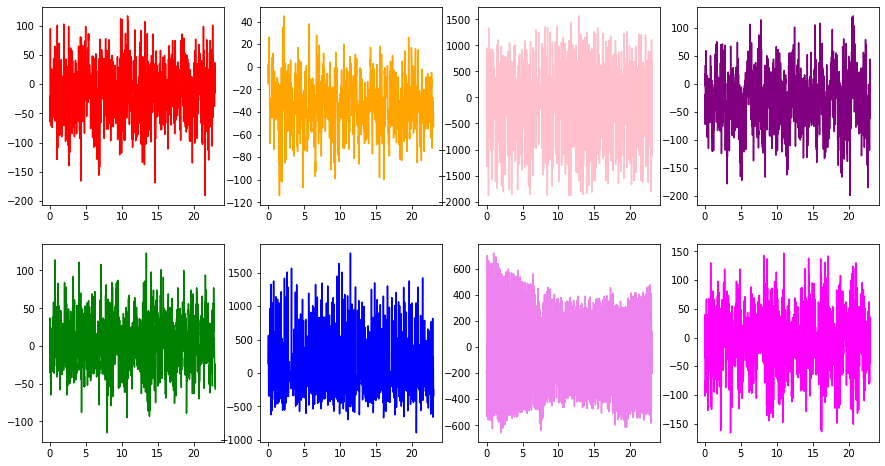

In [292]:
plt.figure(figsize=(15,8))
n=1
m=23
l3=['red','orange', 'pink','purple','green','blue','violet','magenta']
for i in range(1,9):
    plt.subplot(2,4,i)
    function(n,m,l3[i-1])
    n=n+23
    m=n+23


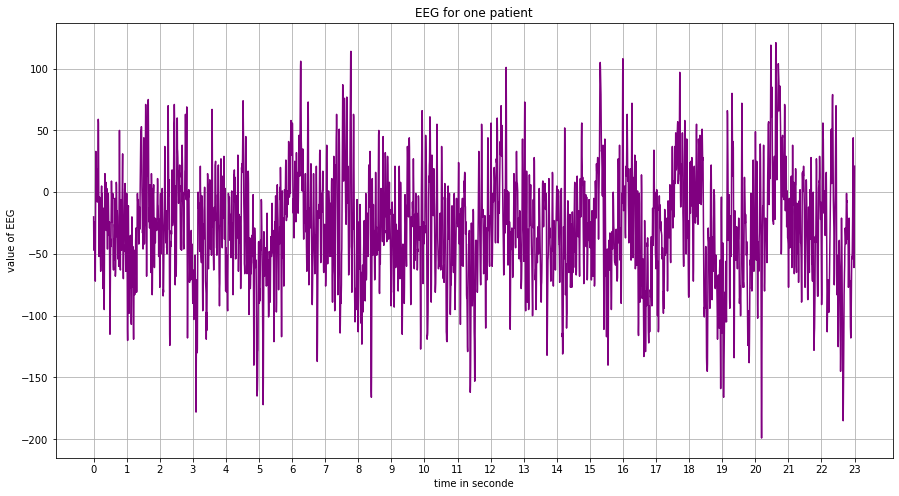

In [293]:
plt.figure(figsize=(15,8))
plt.xticks ([i for i in range(0,24)])
function(70,93,'purple')
plt.title ("EEG for one patient" )
plt.xlabel ('time in seconde')
plt.ylabel('value of EEG')
plt.grid(axis="both")


# classical model: logistic regression

## data exploration

In [398]:
import pandas as pd
data = pd.read_csv('/media/mydata/AIMS-CAMEROON/Data science/WEEK 3/GROUP ASSIGNEMENT/data.csv')
#create a column called class where 1 is when a patient is having a seizure and 0 is when a patient is not having 
#a seizure.
data["class"] = data.y == 1
data["class"] = data["class"].astype(int)
data.pop('y')
data.drop(data.columns[0], axis=1,inplace=True)
# Calculate the prevalence of the positive class which is the percentage of our samples that has the characteristic 
#we are trying to predict

def calc_prevalence(f):
    # this function calculates the prevalence of the positive class (label = 1)
    return sum(f) / len(f)

p=calc_prevalence(data["class"].values)
print("prevalence of the positive class:",p)
data





prevalence of the positive class: 0.2


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,class
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,15,16,12,5,-1,-18,-37,-47,-48,0
11496,-47,-11,28,77,141,211,246,240,193,136,...,-65,-33,-7,14,27,48,77,117,170,1
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,0
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,121,135,148,143,116,86,68,59,55,0


# Feature Engineering

## Building Training/Validation/Test Samples

In [430]:
data_valid_test = data.sample(frac=0.4,random_state=40)
data_test = data_valid_test.sample(frac=0.5,random_state=40)
data_valid = data_valid_test.drop(data_test.index)
data_train = data.drop(data_valid_test.index)

In [431]:
#check the prevalence
ptt=calc_prevalence(data_test["class"].values)
pva=calc_prevalence(data_valid["class"].values)
ptr=calc_prevalence(data_train["class"].values)
print("test prevalence",ptt)
print("valid prevalence",pva)
print("train prevalence",ptr)

test prevalence 0.20173913043478262
valid prevalence 0.1891304347826087
train prevalence 0.20304347826086958


## create the X and y matrices

In [432]:

X_train = data_train[cols_input].values
X_valid = data_valid[cols_input].values
X_test = data_test[cols_input].values

y_train = data_train['class'].values
y_valid = data_valid['class'].values
y_test = data_test['class'].values


## transform our data matrices

In [433]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
scaler.fit(X_train)
X_train_tf = scaler.transform(X_train)
scaler.fit(X_valid)
X_valid_tf = scaler.transform(X_valid)
scaler.fit(X_test)
X_test_tf = scaler.transform(X_test)

## function to report different scores

In [434]:
from sklearn.metrics import  accuracy_score, precision_score, recall_score
def report_score(y_actual, y_pred):
    accuracy = accuracy_score(y_actual, y_pred)
    recall = recall_score(y_actual, y_pred )
    precision = precision_score(y_actual, y_pred )
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print(' ')
    return  accuracy, recall, precision

# train - test and validation

In [435]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 40,solver='lbfgs')
lr.fit(X_train_tf, y_train)
y_train_predict=lr.predict(X_train_tf)
y_valid_predict=lr.predict(X_valid_tf)
y_test_predict=lr.predict(X_test_tf)
print('Logistic Regression')
print('Training:')
lr_train_accuracy, lr_train_recall,lr_train_precision = report_score(y_train,y_train_predict)
print('Validation:')
lr_valid_accuracy, lr_valid_recall,lr_valid_precision = report_score(y_valid,y_valid_predict)
print('test:')
lr_test_accuracy, lr_test_recall,lr_test_precision = report_score(y_test,y_test_predict)


Logistic Regression
Training:
accuracy:0.830
recall:0.167
precision:0.983
 
Validation:
accuracy:0.833
recall:0.120
precision:1.000
 
test:
accuracy:0.820
recall:0.108
precision:1.000
 


/home/cyrillefeudjio/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
